<table align="left" width=100%>
    <tr>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Master Class Notebook - Week 3 </b><br>(Part 1 - Logistic Regression)
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

This dataset comes from research by Semeion, Research Center of Sciences of Communication. The original aim of the research was to correctly classify the type of surface defects in stainless steel plates, (either a common fault or other fault). The Input vector was made up of 27 indicators that approximately describe the geometric shape of the defect and its outline. According to the research paper, Semeion was commissioned by the Centro Sviluppo Materiali (Italy) for this task.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## About the dataset (Steel Faults Binary Classification)

These are the 27 independent variables in the study. The data description for these variables is not provided.
* X_Minimum
* X_Maximum
* Y_Minimum
* Y_Maximum
* Pixels_Areas
* X_Perimeter
* Y_Perimeter
* Sum_of_Luminosity
* Minimum_of_Luminosity
* Maximum_of_Luminosity
* Length_of_Conveyer
* TypeOfSteel_A300
* TypeOfSteel_A400
* Steel_Plate_Thickness
* Edges_Index
* Empty_Index
* Square_Index
* Outside_X_Index
* Edges_X_Index
* Edges_Y_Index
* Outside_Global_Index
* LogOfAreas
* Log_X_Index
* Log_Y_Index
* Orientation_Index
* Luminosity_Index
* SigmoidOfAreas


For the purposes of this study, the target variable is Other_Faults, which can take two values : 0 and 1. (0: Common_Fault, 1: Other_Fault)

Here is the original data source: http://archive.ics.uci.edu/dataset/198/steel+plates+faults


<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [2]:
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# import train-test split
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [20,12]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [4]:
# load the csv file
# store the data in 'df_faults'
df_faults = pd.read_csv('steel_faults_binary.csv')

# display first five observations using head()
df_faults.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.049800,0.241500,0.181800,0.004700,0.470600,1.000000,1.000000,2.426500,0.903100,1.643500,0.818200,-0.291300,0.582200,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.764700,0.379300,0.206900,0.003600,0.600000,0.966700,1.000000,2.033400,0.778200,1.462400,0.793100,-0.175600,0.298400,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.971000,0.342600,0.333300,0.003700,0.750000,0.947400,1.000000,1.851300,0.778200,1.255300,0.666700,-0.122800,0.215000,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.728700,0.441300,0.155600,0.005200,0.538500,1.000000,1.000000,2.245500,0.845100,1.653200,0.844400,-0.156800,0.521200,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.069500,0.448600,0.066200,0.012600,0.283300,0.988500,1.000000,3.381800,1.230500,2.409900,0.933800,-0.199200,1.000000,0


**Let us now see the number of variables and observations in the data.**

In [5]:
# use 'shape' to check the dimension of data
df_faults.shape

(1941, 28)

**Interpretation:** The data has 1941 observations and 28 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [6]:
# use 'dtypes' to check the data type of a variable
df_faults.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Other_Faults               int64
dtype: object

**Interpretation:** All the variables are numerical and the datatype is assigned correctly.

<a id="dist"></a>
## 2.3 Distribution of Variables

**Distribution of numeric independent variables.**

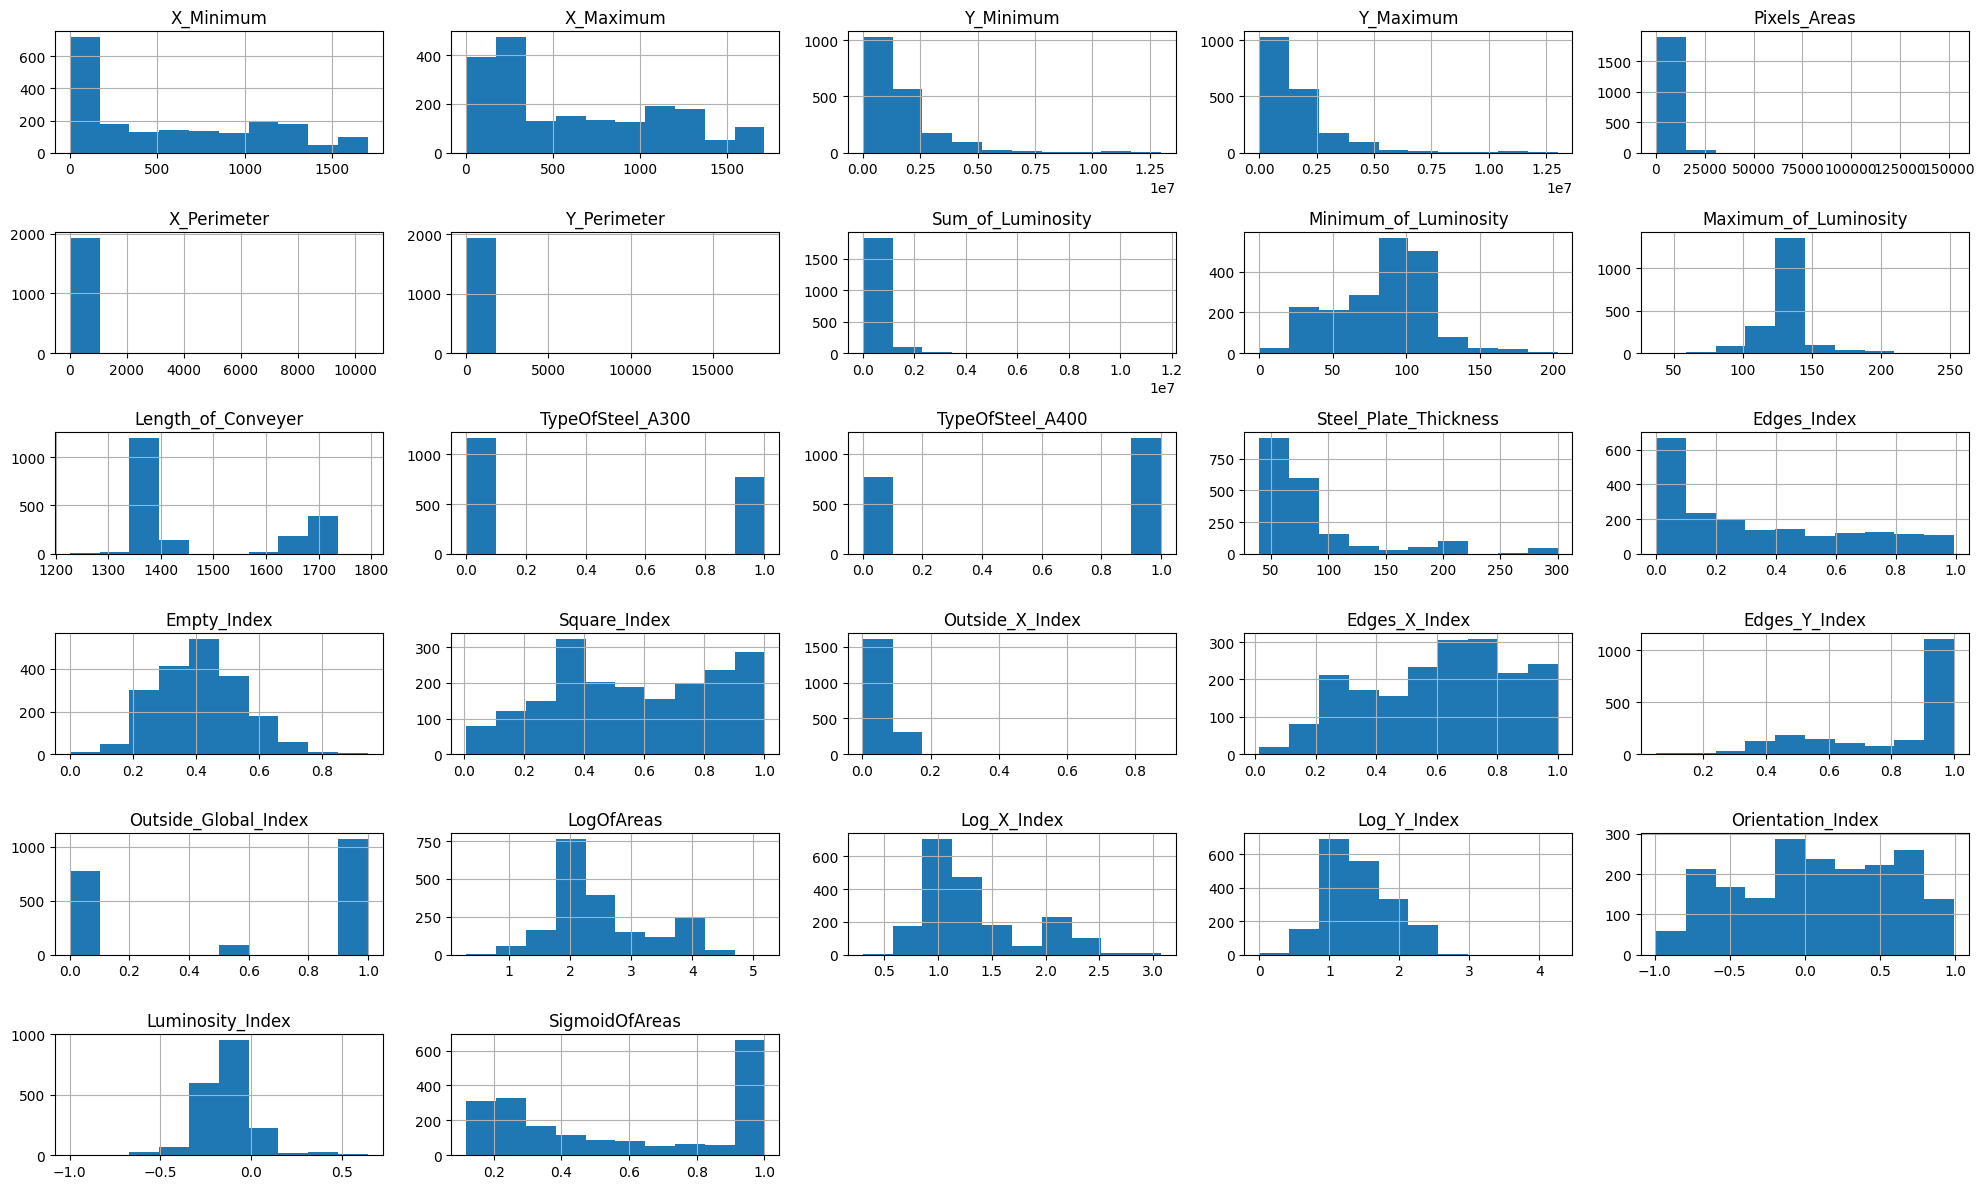

Skewness:


X_Minimum                0.500897
X_Maximum                0.524210
Y_Minimum                2.811213
Y_Maximum                2.811169
Pixels_Areas            14.083822
X_Perimeter             21.539451
Y_Perimeter             39.293158
Sum_of_Luminosity        7.730720
Minimum_of_Luminosity   -0.107098
Maximum_of_Luminosity    1.287035
Length_of_Conveyer       0.851422
TypeOfSteel_A300         0.407249
TypeOfSteel_A400        -0.407249
Steel_Plate_Thickness    2.206935
Edges_Index              0.685771
Empty_Index              0.293468
Square_Index            -0.056306
Outside_X_Index          5.181830
Edges_X_Index           -0.235096
Edges_Y_Index           -0.928582
Outside_Global_Index    -0.306422
LogOfAreas               0.748284
Log_X_Index              1.001014
Log_Y_Index              0.445101
Orientation_Index       -0.153446
Luminosity_Index         0.679339
SigmoidOfAreas           0.125789
dtype: float64

In [7]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_faults.drop(columns = ['Other_Faults']).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_faults.drop('Other_Faults', axis = 1).skew()

**Interpretation:** The above plot indicates that almost all the variables are skewed.

#### Distribution of dependent variable.

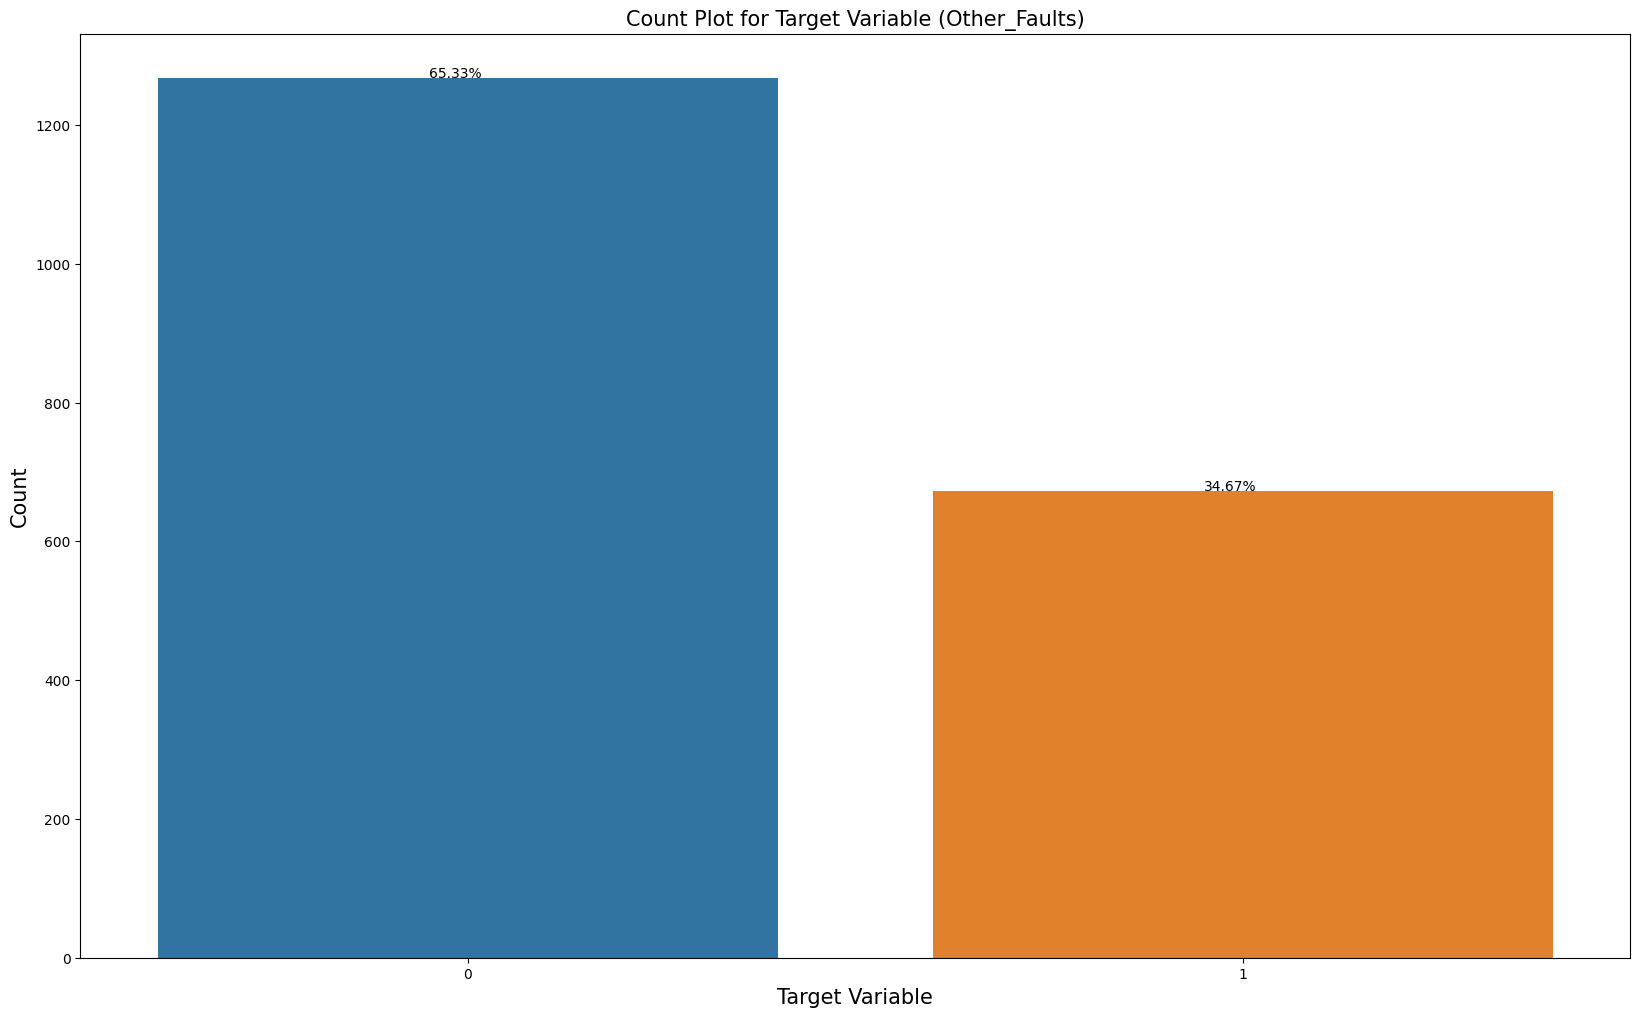

In [8]:
# consider only the target variable
df_target = df_faults['Other_Faults'].copy()

# get counts of 0's and 1's in the 'Other_Faults' variable
df_target.value_counts()

# plot the countplot of the variable 'Other_Faults'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Other_Faults)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

**Interpretation:** The above plot shows that there is an imbalance in the target variable, with the Other_Faults (1) value occuring less often than the Common_Faults (0).

#### Print the summary statistics for the dataset

In [9]:
df_faults.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.000000,571.136012,520.690671,0.000000,51.000000,435.000000,1053.000000,1705.000000
X_Maximum,1941.000000,617.964451,497.627410,4.000000,192.000000,467.000000,1072.000000,1713.000000
Y_Minimum,1941.000000,1650684.868109,1774578.414728,6712.000000,471253.000000,1204128.000000,2183073.000000,12987661.000000
Y_Maximum,1941.000000,1650738.705307,1774590.089000,6724.000000,471281.000000,1204136.000000,2183084.000000,12987692.000000
Pixels_Areas,1941.000000,1893.878413,5168.459560,2.000000,84.000000,174.000000,822.000000,152655.000000
X_Perimeter,1941.000000,111.855229,301.209187,2.000000,15.000000,26.000000,84.000000,10449.000000
Y_Perimeter,1941.000000,82.965997,426.482879,1.000000,13.000000,25.000000,83.000000,18152.000000
Sum_of_Luminosity,1941.000000,206312.147862,512293.587609,250.000000,9522.000000,19202.000000,83011.000000,11591414.000000
Minimum_of_Luminosity,1941.000000,84.548686,32.134276,0.000000,63.000000,90.000000,106.000000,203.000000
Maximum_of_Luminosity,1941.000000,130.193715,18.690992,37.000000,124.000000,127.000000,140.000000,253.000000


#### Inference:

1. There is a large variation both within and between the variables. So, some standardization and scaling methods need to be applied to reduce the undue influence of any variable.

2. The variables TypeOfSteel_A300 and TypeOfSteel_A400 are binary in nature, so these will be excluded from the process of standardization.

<a id="null"></a>
## 2.4 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [10]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_faults.isnull().sum().sort_values(ascending=False)

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_faults.isnull().sum()*100/df_faults.isnull().count()).sort_values(ascending=False)

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys'
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
X_Minimum,0,0.000000
X_Maximum,0,0.000000
SigmoidOfAreas,0,0.000000
Luminosity_Index,0,0.000000
Orientation_Index,0,0.000000
Log_Y_Index,0,0.000000
Log_X_Index,0,0.000000
LogOfAreas,0,0.000000
Outside_Global_Index,0,0.000000
Edges_Y_Index,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="scale"></a>
## 2.5 Scale the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [11]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_faults' except for the target variable.
#  Also, as discussed previously, exclude TypeOfSteel_A300, and TypeOfSteel_A400 from standardization, as these have binary values
num_scaled = X_scaler.fit_transform(df_faults.drop(columns = ['Other_Faults', 'TypeOfSteel_A300', 'TypeOfSteel_A400']))
target = df_faults.loc[:, 'Other_Faults']

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_faults.drop(columns = ['Other_Faults', 'TypeOfSteel_A300', 'TypeOfSteel_A400']).columns)

X = pd.concat([df_num_scaled, df_faults.loc[:,['TypeOfSteel_A300', 'TypeOfSteel_A400' ]]], axis = 1)

<a id="split"></a>
## 2.6 Train-Test Split

Before applying various classification techniques to predict the type of fault present in the steel, let us split the dataset in train and test set.

In [12]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1552, 28)
y_train (1552,)
X_test (389, 28)
y_test (389,)


#### Create a generalized function to create a dataframe containing the scores for the models.

In [13]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function
def update_score_card(model, cutoff):

    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]

    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)},
                                    ignore_index = True)

<a id="logit"></a>
# 3. Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [14]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

         Current function value: 0.515977
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           Other_Faults   No. Observations:                 1552
Model:                          Logit   Df Residuals:                     1525
Method:                           MLE   Df Model:                           26
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                  0.2035
Time:                        07:38:12   Log-Likelihood:                -800.80
converged:                      False   LL-Null:                       -1005.3
Covariance Type:            nonrobust   LLR p-value:                 1.763e-70
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.6500        nan        nan        nan         nan         nan
X_Minimum                -3.1717

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Interpretation:** The `Pseudo R-squ.` obtained from the above model summary is the value of `McFadden's R-squared`. This value can be obtained from the formula:

<p style='text-indent:25em'> <strong> McFadden's R-squared = $ 1 - \frac{Log-Likelihood}{LL-Null} $</strong> </p>

Where,<br>
Log-Likelihood: It is the maximum value of the log-likelihood function<br>
LL-Null: It is the maximum value of the log-likelihood function for the model containing only the intercept

The LLR p-value is less than 0.05, implies that the model is significant.

There are different types of `pseudo R-squared` such as `Cox & Snell R-squared`, `Nagelkerke R-squared` and so on.

**Cox & Snell R-squared:** The convergence of the logistic model can be determined by the R-squared value. It is given by the formula:

<p style='text-indent:25em'> <strong> Cox & Snell R-squared = $ 1 - (\frac{L(M_{Intercept})}{L(M_{Full})})^{2/N} $</strong> </p>

Where,<br>
L(M): The conditional probability of target variable given the independent variables<br>
N: Total number of observations

**Note:** The maximum of Cox & Snell R-squared is always less than 1. It is equal to $(1 - (L(M_{Intercept})^{2/N})$



**Nagelkerke R-squared:** It is defined as the ratio of Cox & Snell R-squared to the maximum of Cox & Snell R-squared. The formula is given as:

<p style='text-indent:25em'> <strong>Nagelkerke  R-squared = $ \frac{1 - (\frac{L(M_{Intercept})}{L(M_{Full})})^{2/N}}{1 -  (L(M_{Intercept})^{2/N}} $</strong> </p>



Thus, Nagelkerke R-squared can be equal to 1, if $L(M_{Full}) = 1$


**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [15]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 1655.5914541756977


We can use the AIC value to compare different models created on the same dataset.

### Interpret the odds for each variable

In [16]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds'])

# print the dataframe
df_odds

,Odds
const,0.522062
X_Minimum,0.041930
X_Maximum,24.375376
Y_Minimum,inf
Y_Maximum,0.000000
Pixels_Areas,1.525746
X_Perimeter,0.024138
Y_Perimeter,843.470392
Sum_of_Luminosity,0.521619
Minimum_of_Luminosity,2.841421


**Interpretation**
* odds_const :	The odds of finding an other_fault  is 0.52, considering all other variables take zero value
* odds_X_Minimum :	It implies that the odds of finding an other_fault increases by a factor of 0.04, due to one unit increase in X_Minimum keeping other variables constant
* odds_X_Maximum :	It implies that the odds of finding an other_fault increases by a factor of 24.38, due to one unit increase in X_Maximum keeping other variables constant
* odds_Y_Minimum :	It implies that the odds of finding an other_fault increases by a factor of Infinity due to one unit increase in Y_Minimum keeping other variables constant
* odds_Y_Maximum :	It implies that the odds of finding an other_fault increases by a factor of 0, due to one unit increase in Y_Maximum keeping other variables constant
* odds_Pixels_Areas :	It implies that the odds of finding an other_fault increases by a factor of 1.53, due to one unit increase in Pixels_Areas keeping other variables constant
* odds_X_Perimeter :	It implies that the odds of finding an other_fault increases by a factor of 0.02, due to one unit increase in X_Perimeter keeping other variables constant
* odds_Y_Perimeter :	It implies that the odds of finding an other_fault increases by a factor of 843.47, due to one unit increase in Y_Perimeter keeping other variables constant
* odds_Sum_of_Luminosity :	It implies that the odds of finding an other_fault increases by a factor of 0.52, due to one unit increase in Sum_of_Luminosity keeping other variables constant
* odds_Minimum_of_Luminosity :	It implies that the odds of finding an other_fault increases by a factor of 2.84, due to one unit increase in Minimum_of_Luminosity keeping other variables constant
* odds_Maximum_of_Luminosity :	It implies that the odds of finding an other_fault increases by a factor of 1.23, due to one unit increase in Maximum_of_Luminosity keeping other variables constant
* odds_Length_of_Conveyer :	It implies that the odds of finding an other_fault increases by a factor of 1.3, due to one unit increase in Length_of_Conveyer keeping other variables constant
* odds_Steel_Plate_Thickness :	It implies that the odds of finding an other_fault increases by a factor of 1.78, due to one unit increase in Steel_Plate_Thickness keeping other variables constant
* odds_Edges_Index :	It implies that the odds of finding an other_fault increases by a factor of 1.04, due to one unit increase in Edges_Index keeping other variables constant
* odds_Empty_Index :	It implies that the odds of finding an other_fault increases by a factor of 1.12, due to one unit increase in Empty_Index keeping other variables constant
* odds_Square_Index :	It implies that the odds of finding an other_fault increases by a factor of 0.93, due to one unit increase in Square_Index keeping other variables constant
* odds_Outside_X_Index :	It implies that the odds of finding an other_fault increases by a factor of 0.66, due to one unit increase in Outside_X_Index keeping other variables constant
* odds_Edges_X_Index :	It implies that the odds of finding an other_fault increases by a factor of 1.19, due to one unit increase in Edges_X_Index keeping other variables constant
* odds_Edges_Y_Index :	It implies that the odds of finding an other_fault increases by a factor of 0.73, due to one unit increase in Edges_Y_Index keeping other variables constant
* odds_Outside_Global_Index :	It implies that the odds of finding an other_fault increases by a factor of 0.74, due to one unit increase in Outside_Global_Index keeping other variables constant
* odds_LogOfAreas :	It implies that the odds of finding an other_fault increases by a factor of 0.45, due to one unit increase in LogOfAreas keeping other variables constant
* odds_Log_X_Index :	It implies that the odds of finding an other_fault increases by a factor of 21.54, due to one unit increase in Log_X_Index keeping other variables constant
* odds_Log_Y_Index :	It implies that the odds of finding an other_fault increases by a factor of 0.29, due to one unit increase in Log_Y_Index keeping other variables constant
* odds_Orientation_Index :	It implies that the odds of finding an other_fault increases by a factor of 7.23, due to one unit increase in Orientation_Index keeping other variables constant
* odds_Luminosity_Index :	It implies that the odds of finding an other_fault increases by a factor of 0.43, due to one unit increase in Luminosity_Index keeping other variables constant
* odds_SigmoidOfAreas :	It implies that the odds of finding an other_fault increases by a factor of 0.84, due to one unit increase in SigmoidOfAreas keeping other variables constant
* odds_TypeOfSteel_A300 :	It implies that the odds of finding an other_fault increases by a factor of 0.46, due to one unit increase in TypeOfSteel_A300 keeping other variables constant
* odds_TypeOfSteel_A400 :	It implies that the odds of finding an other_fault increases by a factor of 1.14, due to one unit increase in TypeOfSteel_A400 keeping other variables constant


**Do predictions on the test set.**

In [17]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

27    0.488874
369   0.238566
475   0.015681
828   0.398017
576   0.092243
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [18]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [19]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 0, 0, 0, 0]

#### Plot the confusion matrix.

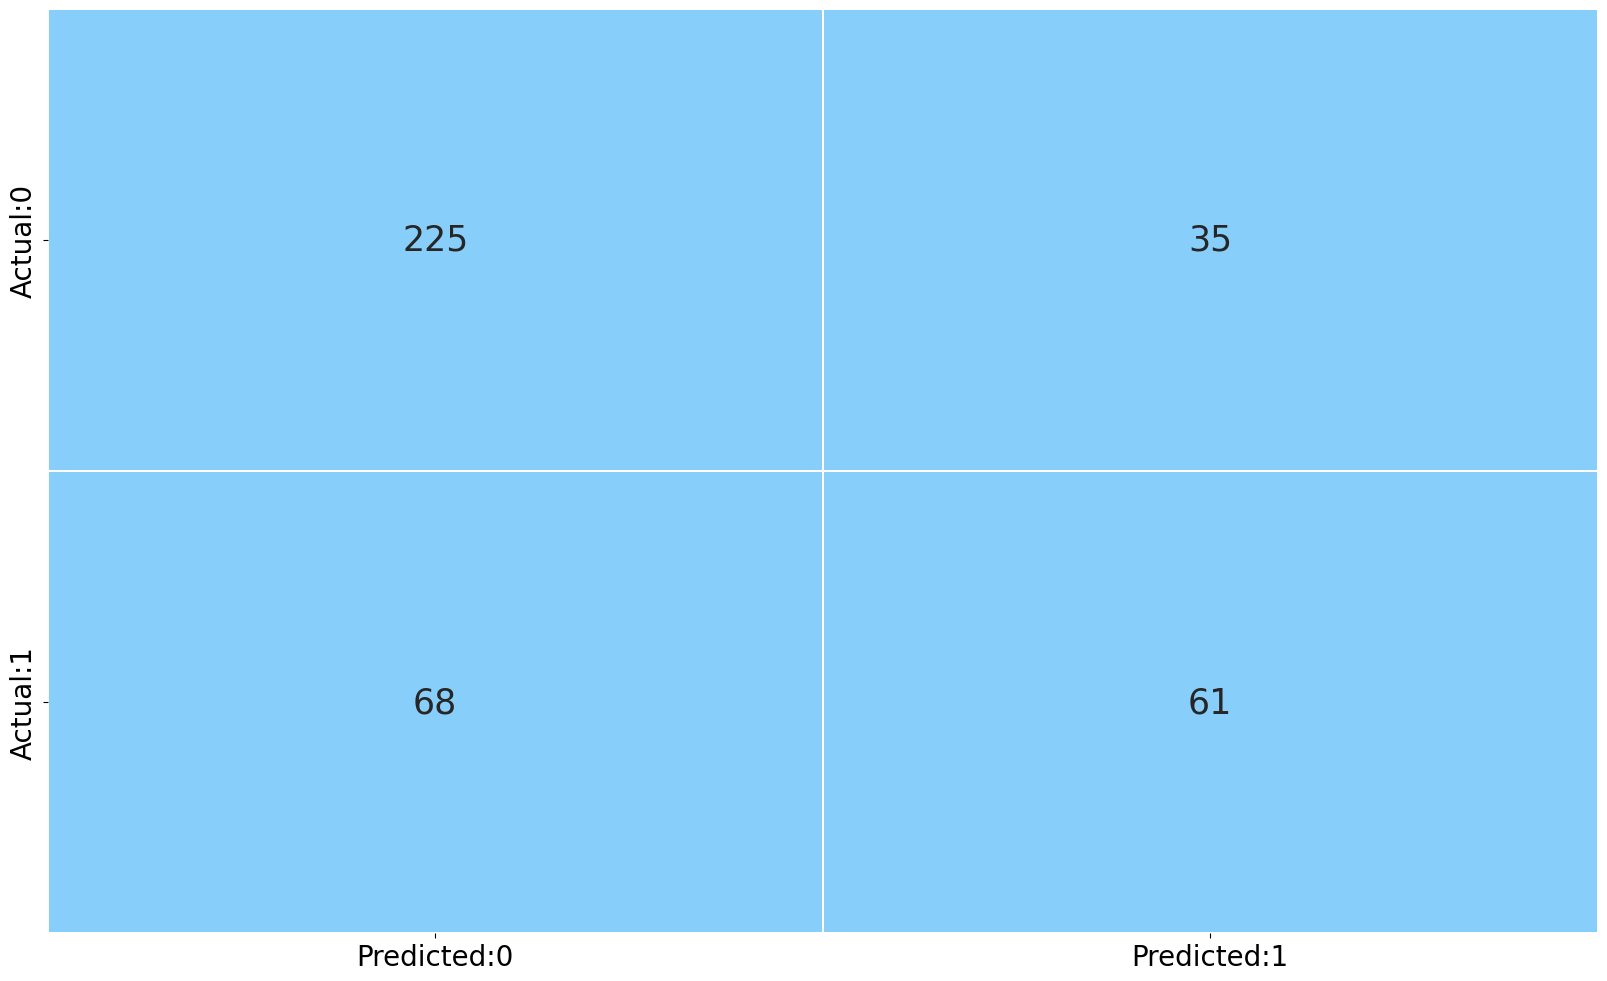

In [20]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [21]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

**Compute various performance metrics.**

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [22]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.6354166666666666

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [23]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.4728682170542636

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [24]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.8653846153846154

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [25]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.5422222222222222

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [26]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.7352185089974294

**Interpretation:** For our dataset, the values for accuracy and f1-score are not equal. We can say that our model is 73.5% accurate.

We can also calculate the above measures using the `classification_report()`

In [27]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       260
           1       0.64      0.47      0.54       129

    accuracy                           0.74       389
   macro avg       0.70      0.67      0.68       389
weighted avg       0.72      0.74      0.72       389



**Interpretation:**

From the above output, we can infer that the recall of the positive class is known as `sensitivity` and the recall of the negative class is `specificity`.

`support` is the number of observations in the corresponding class.

The `macro average` in the output is obtained by averaging the unweighted mean per label and the `weighted average` is given by averaging the support-weighted mean per label.

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [28]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.36155329285976057


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.5) is 0.36, we can say that there is not much agreement between the actual and predicted values.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

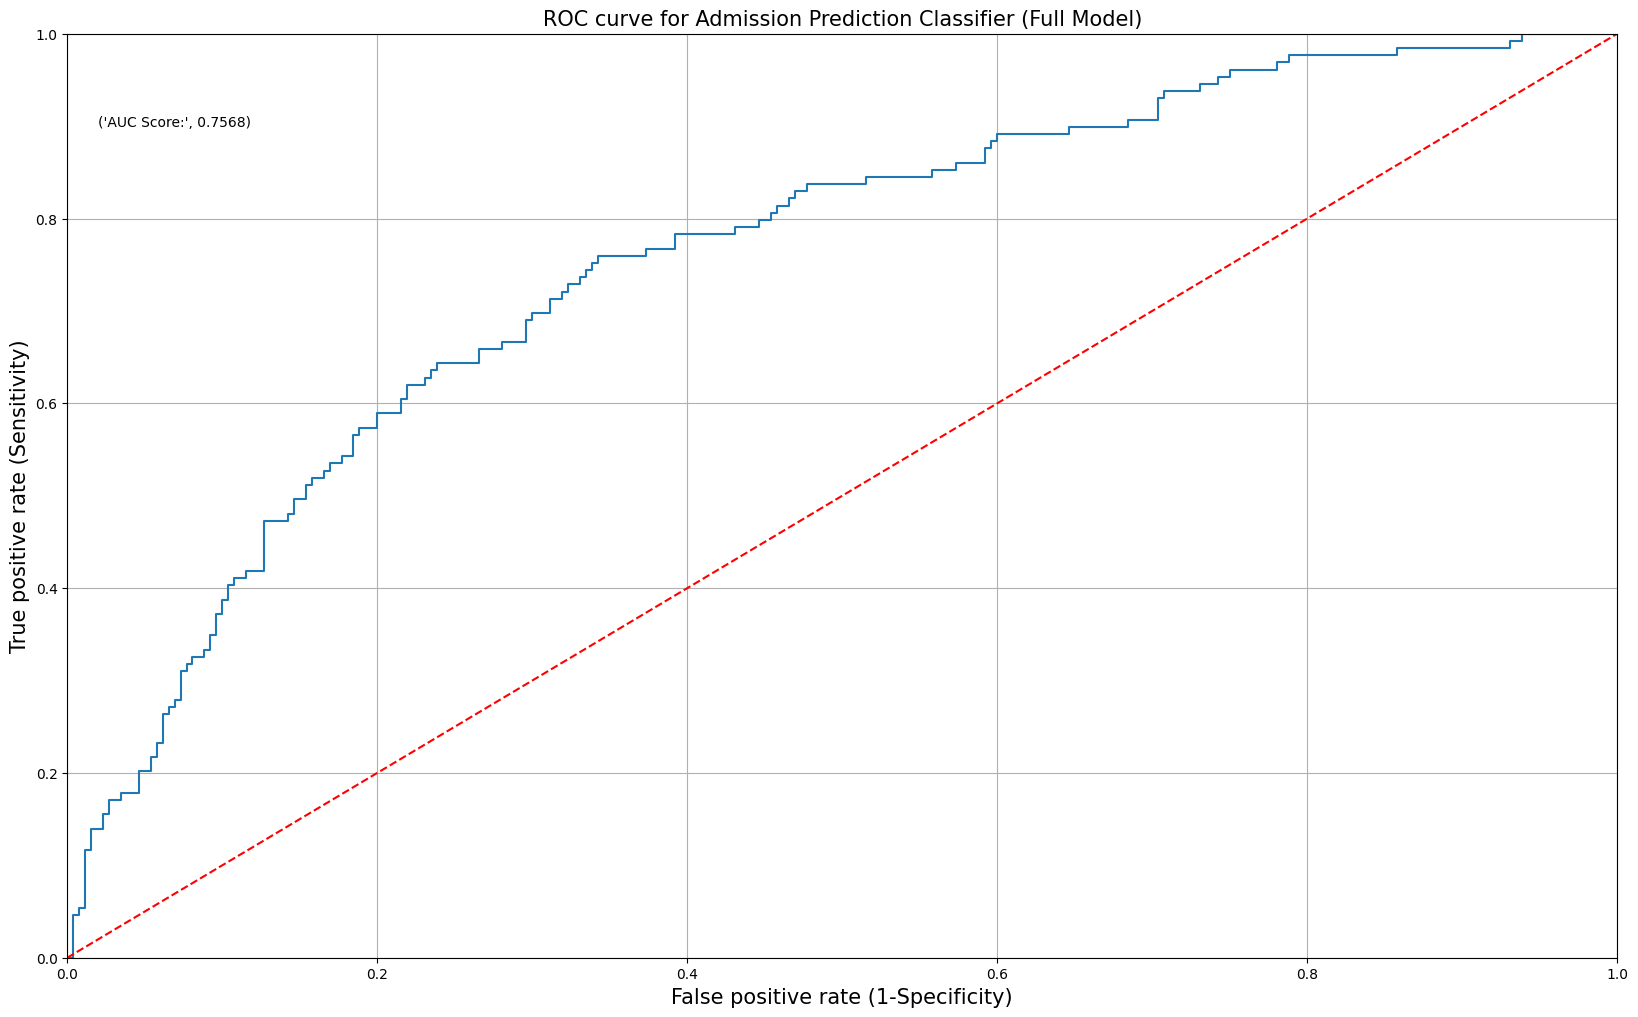

In [29]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

# plot the grid
plt.grid(True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.7568.

<a id="cut_off"></a>
## 3.1 Identify the Best Cut-off Value

**Tabulate the performance measures for different cut-offs.**

The performance measures that we obtained above, are for the cut_off = 0.5. Now, let us consider a list of values as cut-off and calculate the different performance measures.

In [30]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

In [31]:
# print the score card
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset'
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.578757,0.371681,0.976744,0.444730,0.111703,0.538462
1,0.200000,0.607335,0.393939,0.906977,0.506427,0.161638,0.549296
2,0.300000,0.676088,0.474178,0.782946,0.640103,0.302546,0.590643
3,0.400000,0.698539,0.579710,0.620155,0.724936,0.390220,0.599251
4,0.500000,0.669126,0.635417,0.472868,0.735219,0.361553,0.542222
5,0.600000,0.618530,0.661290,0.317829,0.719794,0.272748,0.429319
6,0.700000,0.581604,0.666667,0.217054,0.704370,0.196613,0.327485
7,0.800000,0.562075,0.818182,0.139535,0.704370,0.156946,0.238411
8,0.900000,0.519410,0.750000,0.046512,0.678663,0.050831,0.087591


**Interpretation:** The above dataframe shows that, the model cut_off probability 0.4, returns the highest AUC score, f1-score, and kappa score. The cut-off probability 0.5 returns the highest accuracy score.

#### In the above method, we passed the list of values for the cut-off. But, this method is not efficient as one can pass different values and obtain a cut-off based on the passed values.

#### To obtain the optimal cut-off value we use the following methods:

1. Youden's Index
2. Cost-based Method

<a id="youden"></a>
### 3.1.1 Youden's Index

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>

<p style='text-indent:12em'> <strong>Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [32]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.759690,0.342308,0.327204,0.417382
1,0.751938,0.338462,0.329526,0.413476
2,0.751938,0.342308,0.329161,0.409630
3,0.744186,0.334615,0.331705,0.409571
4,0.744186,0.338462,0.330706,0.405725


As we can see that the optimal cut-off probability is approximately 0.4. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.4, then consider it to be 0 else consider it to be 1.

In [33]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.4 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

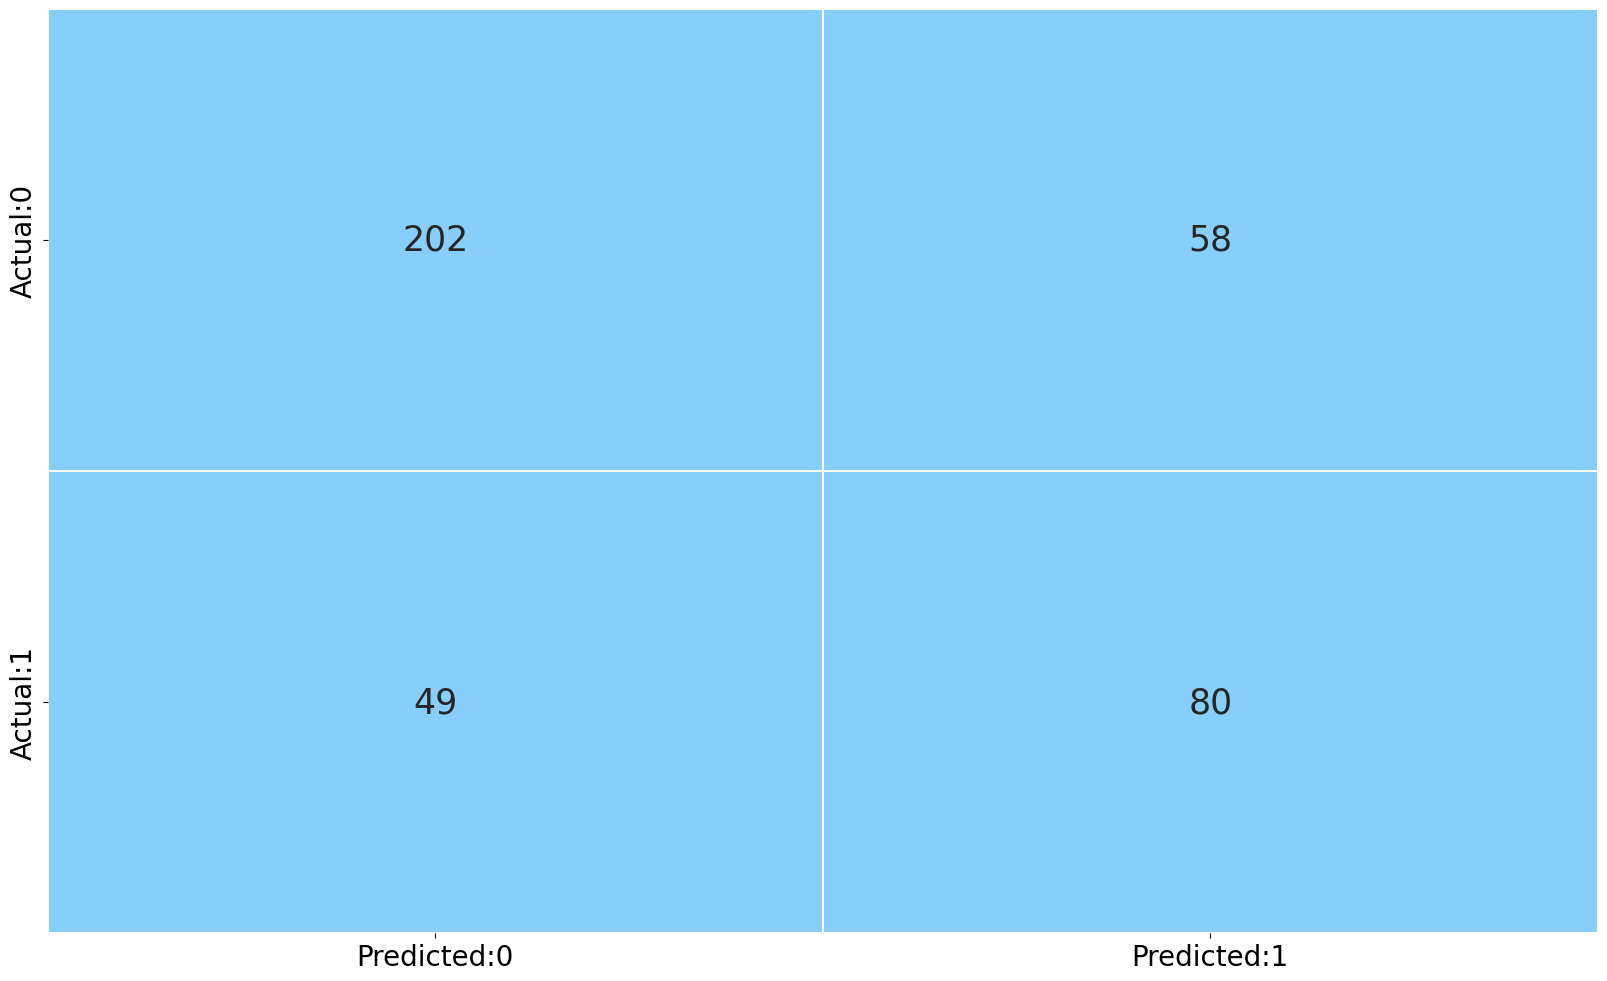

In [34]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_youden)

# label the confusion matrix
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Compute various performance metrics.**

In [35]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       260
           1       0.58      0.62      0.60       129

    accuracy                           0.72       389
   macro avg       0.69      0.70      0.69       389
weighted avg       0.73      0.72      0.73       389



**Interpretation:** From the above output, we can see that the model with cut-off = 0.4, is 72% accurate. The specificity and the sensitivity are nearly balanced.

In [36]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_youden)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.3902196047407668


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.62) is 0.6992, we can say that there is substantial agreement between the actual and predicted values.

<a id="cost"></a>
### 3.1.2 Cost-based Method

The full logistic regression model (build in section 3), have different values for false positives (FP) and false negatives (FN). Thus, we can use the cost-based method to calculate the optimal value of the cut-off. In this method, we find the optimal value of the cut-off for which the total cost is minimum. The total cost is given by the formula:

<p style='text-indent:25em'> <strong>total_cost = FN x C_1 + FP x C_2 </strong> </p>

Where,<br>
C_1: It is the cost of false negatives <br>
C_2: It is the cost of false positives

The cost values can be decided using business knowledge.

In [37]:
# define a function to calculate the total_cost for a cut-off value
# pass the actual values of y, predicted probabilities of y, cost for FN and FP
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    # pass the actual and predicted values to calculate the confusion matrix
    cm = confusion_matrix(actual_value, predicted_value)

    # create an array of the confusion matrix
    cm_array = np.array(cm)

    # return the total_cost
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

# create an empty dataframe to store the cost for different probability cut-offs
df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

# initialize i to '0' corresponding to the 1st row in the dataframe
i = 0

# use for loop to calculate 'total_cost' for each cut-off probability value
# call the function 'calculate_total_cost' to calculate the cost
# pass the actual y-values
# calculate the predicted y-values from 'y_pred_prob' for the cut-off probability value
# assign the costs 7 and 3.5 to False Negatives and False Positives respectively
# add the obtained 'cut_off' and 'total_cost' at the ith index of the dataframe
for cut_off in range(10, 100):
    total_cost = calculate_total_cost(y_test,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 7, 3.5)
    df_total_cost.loc[i] = [(cut_off/100), total_cost]

    # increment the value of 'i' for each row index in the dataframe 'df_total_cost'
    i += 1

In [38]:
# sort the dataframe based on the 'total_cost' in the ascending order
# print the first ten rows in the dataframe
df_total_cost.sort_values('total_cost', ascending = True).head(5)

,cut-off,total_cost
29,0.390000,539.000000
23,0.330000,539.000000
24,0.340000,546.000000
28,0.380000,546.000000
30,0.400000,546.000000


From the above output we can see that, the 'total_cost' is same for the cut-off probability values 0.34, 0.38 and 0.40. Thus, we can consider any of these value as the cut-off probability.

Here, we are considering the cut-off value as 0.34. i.e. if 'y_pred_prob' is less than 0.34, then consider it to be 0 else consider it to be 1.

In [39]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_cost = [ 0 if x < 0.34 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

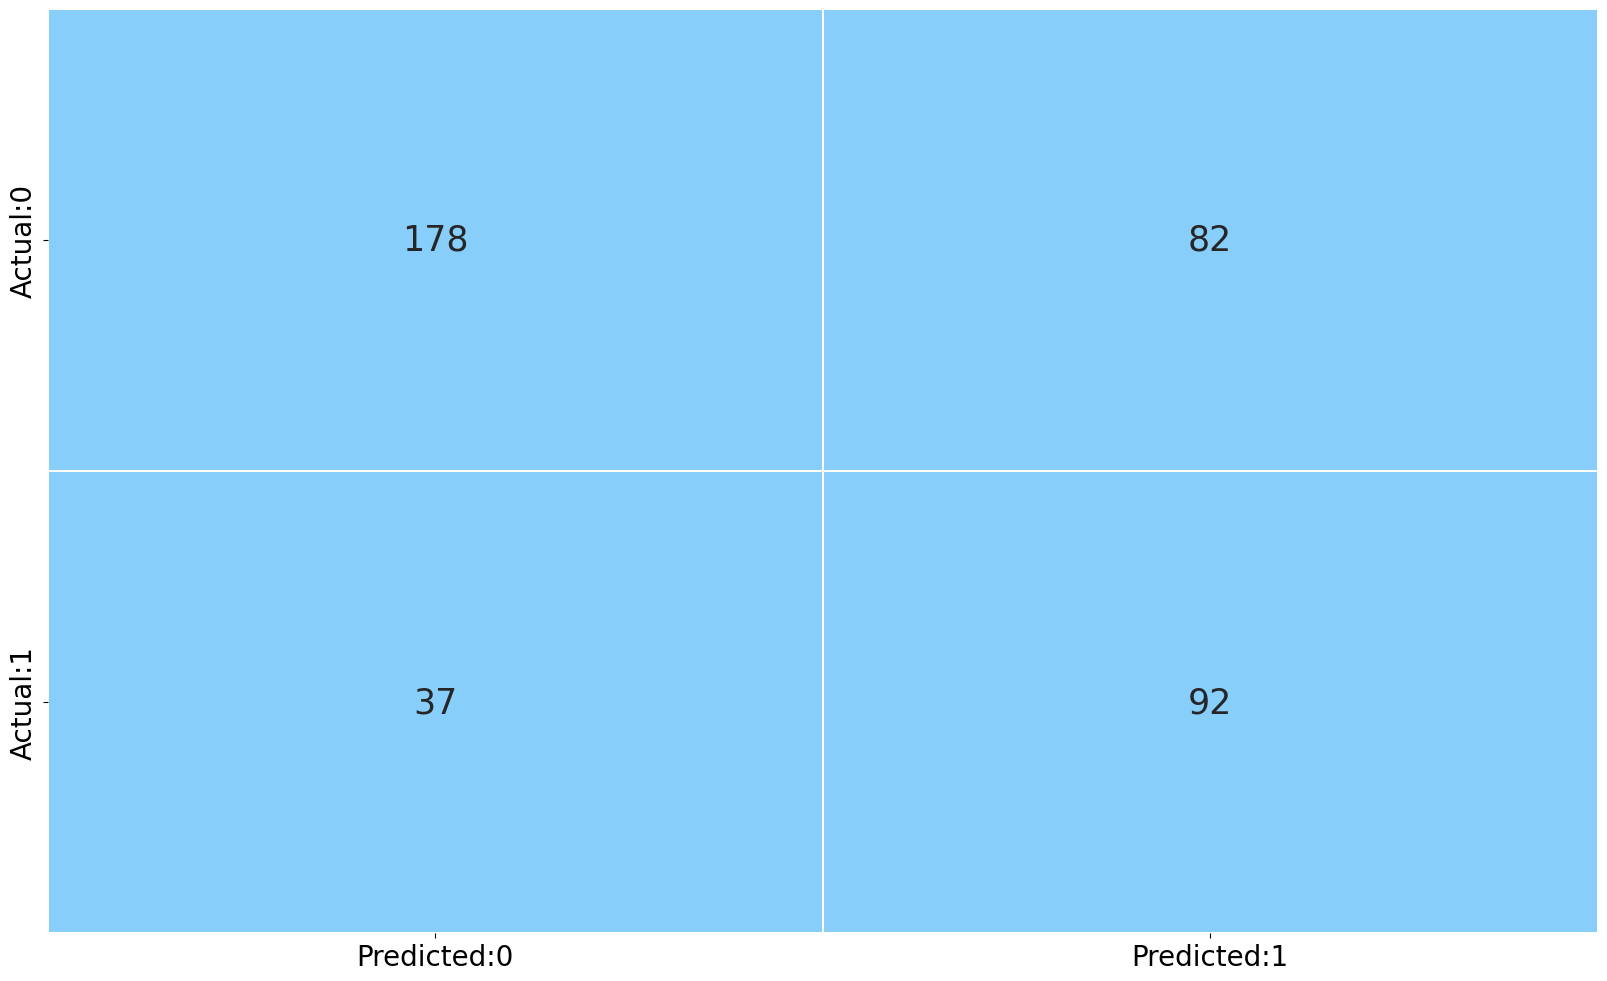

In [40]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_cost)

# label the confusion matrix
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Compute various performance metrics.**

In [41]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_cost)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       260
           1       0.53      0.71      0.61       129

    accuracy                           0.69       389
   macro avg       0.68      0.70      0.68       389
weighted avg       0.73      0.69      0.70       389



**Interpretation:** From the above output, we can see that the model with cut-off = 0.34 is 69% accurate.

In [42]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_cost)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.3656594724220623


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.34) is 0.36, we can say that there is still scope for improvement in the model.

- The methods to improve model performance will be discussed in the subsequent sessions.